<a href="https://colab.research.google.com/github/jmestanza/Guia_2_PASA/blob/master/Guia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import clear_output
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/originales/kickpush.wav"
clear_output()

import warnings
warnings.filterwarnings("ignore")
from scipy.io.wavfile import read
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import wave, struct, math, random
from IPython.display import Audio
from scipy.linalg import toeplitz

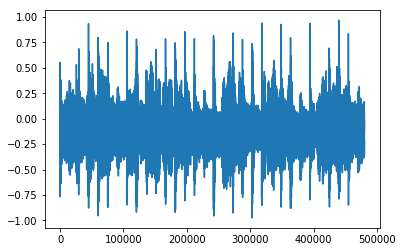

In [4]:
def get_mono_array(stereo_file_name):
    file = read(stereo_file_name)
    fs = file[0]
    datos = np.array(file[1],dtype=float) 
    datos = np.interp(datos, (datos.min(), datos.max()), (-1, +1)) #normalizamos
    if len(np.shape(datos))>1: #si tiene dos canales
        ch0 = datos[:, 0]
        ch1 = datos[:, 1]
        datos = (ch0 + ch1)/2  # o lo hacemos mono
    return fs, datos

#Ejemplo para obtener un numpy array mono a partir de un archivo stereo
file_name = "kickpush.wav" 
fs, data = get_mono_array(file_name)
plt.plot(range(len(data)),data)


In [0]:
Audio(data,rate=fs)

In [0]:
# Ahora empieza el TP
# Obtenemos los datos de sweep lento
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/originales/sweep_lento.wav"
! wget "https://raw.githubusercontent.com/jmestanza/Guia_2_PASA/master/data/grabados/grab_sweep_lento.wav"
clear_output()

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

file_name = "grab_sweep_lento.wav"  
fs, grab_sw_lento = get_mono_array(file_name)
file_name = "sweep_lento.wav"  
fs, sw_lento = get_mono_array(file_name)

In [8]:
# Esta es la grabación
Audio(grab_sw_lento,rate=fs)

In [10]:
# Este es el audio original
Audio(sw_lento,rate=fs)

In [0]:
# Ahora hacemos las cuentas para estimar el filtro óptimo
rxx = autocorr(grab_sw_lento) 
# p es la correlacion cruzada de u(n) y d(n)
p = np.correlate(grab_sw_lento,sw_lento,'full') 
R = toeplitz(rxx)
print('El tamaño de R es de: ',np.shape(R))
print('El tamaño de p es de: ',np.shape(p))
# resuelve el sistema Rwo = p
wo = np.linalg.solve(R, p)